# Лабораторна робота № 2


## 1. Опис прикладної області та конкретної задачі

Прикладна область: вибір місця для відпочинку за невизначеної погоди.  
Задача: студент планує відпустку і має обрати напрямок, не знаючи, якою буде погода. Рішення потрібно прийняти зараз, а погода проявиться пізніше.  
Ми розглядаємо 4 альтернативи та 4 можливі стани природи.

- Альтернативи (варіанти рішень):

  1. Пляж
  2. Гори
  3. Місто
  4. СПА-курорт

- Стани природи (сценарії):
  1. Сонце
  2. Хмарно
  3. Дощ
  4. Шторм

Функція корисності: корисність (виграш) вимірюємо у «балах задоволення» від 0 до 100. Бали відображають приблизну очікувану привабливість відпустки за кожної погоди. Нижче подано базову матрицю рішень.


In [1]:

import numpy as np
import pandas as pd

alternatives = ["Пляж", "Гори", "Місто", "СПА-курорт"]
states       = ["Сонце", "Хмарно", "Дощ", "Шторм"]

U = np.array([
    [90, 60, 15,  5],  # Пляж
    [70, 65, 55, 30],  # Гори
    [60, 70, 65, 50],  # Місто
    [55, 75, 70, 60],  # СПА-курорт
], dtype=float)

df = pd.DataFrame(U, index=alternatives, columns=states)
df


,Сонце,Хмарно,Дощ,Шторм
Пляж,90.0,60.0,15.0,5.0
Гори,70.0,65.0,55.0,30.0
Місто,60.0,70.0,65.0,50.0
СПА-курорт,55.0,75.0,70.0,60.0


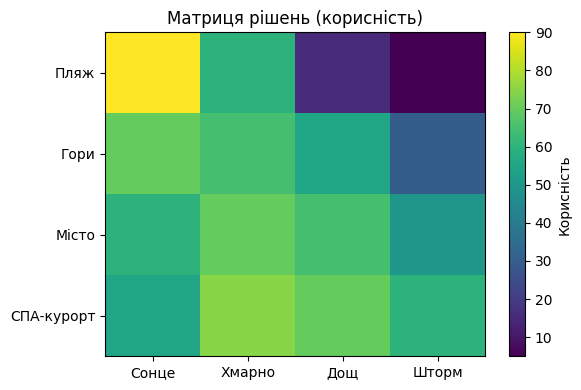

In [2]:

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.imshow(U, cmap="viridis", aspect="auto")
plt.colorbar(label="Корисність")
plt.xticks(ticks=range(len(states)), labels=states, rotation=0)
plt.yticks(ticks=range(len(alternatives)), labels=alternatives)
plt.title("Матриця рішень (корисність)")
plt.tight_layout()
plt.show()


## 2. Критерії прийняття рішень в умовах невизначеності

1. Максимін — обережний підхід: для кожної альтернативи беремо мінімальний можливий виграш (найгірший сценарій) і обираємо альтернативу з найбільшим із цих мінімумів.

2. Максимакс — оптимістичний підхід: для кожної альтернативи беремо максимальний можливий виграш і обираємо альтернативу з найбільшим максимумом.

3. Критерій Севіджа (мінімакс жалю): будуємо матрицю жалю як різницю між найкращим виграшем у кожному стані та виграшем альтернативи. Далі для кожної альтернативи беремо максимальний жаль і обираємо альтернативу з найменшим із цих максимумів.

4. Критерій Гурвіца (компроміс оптимізм–песимізм): для кожної альтернативи змішуємо її найгірший і найкращий результати з коефіцієнтом оптимізму.

5. Критерій Лапласа — усі стани природи вважаємо однаково ймовірними; беремо середнє по станах для кожної альтернативи та обираємо максимум.


In [3]:

def wald_maximin(U):
    worst = U.min(axis=1)
    choice = int(np.argmax(worst))
    return choice, worst

def maximax(U):
    best = U.max(axis=1)
    choice = int(np.argmax(best))
    return choice, best

def minimax_regret(U):
    best_per_state = U.max(axis=0)
    regret = best_per_state - U
    worst_regret = regret.max(axis=1)
    choice = int(np.argmin(worst_regret))
    return choice, regret, worst_regret

def hurwicz(U, alpha=0.6):
    best = U.max(axis=1)
    worst = U.min(axis=1)
    H = alpha*best + (1-alpha)*worst
    choice = int(np.argmax(H))
    return choice, H

def laplace(U):
    avg = U.mean(axis=1)
    choice = int(np.argmax(avg))
    return choice, avg

choice_wald, wald_scores = wald_maximin(U)
choice_maximax, maximax_scores = maximax(U)
choice_savage, regret, worst_regret = minimax_regret(U)
choice_hurwicz, H = hurwicz(U, alpha=0.6)
choice_laplace, avg = laplace(U)

import pandas as pd
summary = pd.DataFrame({
    "Вальд (мін→макс)": wald_scores,
    "Максимакс": maximax_scores,
    "Севідж (макс жалю)": worst_regret,
    "Гурвіц (α=0.6)": H,
    "Лаплас (середнє)": avg
}, index=["Пляж","Гори","Місто","СПА-курорт"])

display(summary.style.format("{:.2f}"))
print("\nРекомендації:")
print(f"  Вальд:          {['Пляж','Гори','Місто','СПА-курорт'][choice_wald]}")
print(f"  Максимакс:      {['Пляж','Гори','Місто','СПА-курорт'][choice_maximax]}")
print(f"  Севідж:         {['Пляж','Гори','Місто','СПА-курорт'][choice_savage]}")
print(f"  Гурвіц (α=0.6): {['Пляж','Гори','Місто','СПА-курорт'][choice_hurwicz]}")
print(f"  Лаплас:         {['Пляж','Гори','Місто','СПА-курорт'][choice_laplace]}")


,Вальд (мін→макс),Максимакс,Севідж (макс жалю),Гурвіц (α=0.6),Лаплас (середнє)
Пляж,5.00,90.00,55.00,56.00,42.50
Гори,30.00,70.00,30.00,54.00,55.00
Місто,50.00,70.00,30.00,62.00,61.25
СПА-курорт,55.00,75.00,35.00,67.00,65.00



Рекомендації:
  Вальд:          СПА-курорт
  Максимакс:      Пляж
  Севідж:         Гори
  Гурвіц (α=0.6): СПА-курорт
  Лаплас:         СПА-курорт


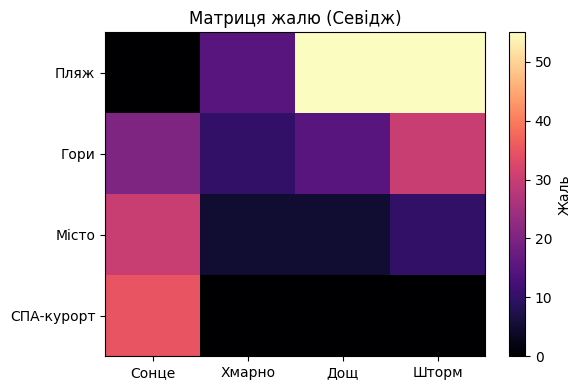

In [4]:

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.imshow(regret, cmap="magma", aspect="auto")
plt.colorbar(label="Жаль")
plt.xticks(ticks=range(len(states)), labels=states)
plt.yticks(ticks=range(len(alternatives)), labels=alternatives)
plt.title("Матриця жалю (Севідж)")
plt.tight_layout()
plt.show()


## 3. Критерій Байєса

За відомих апріорних ймовірностей станів природи обчислюємо очікувану корисність альтернативи як зважене середнє і обираємо максимум.


In [5]:

priors = np.array([0.4, 0.3, 0.2, 0.1])
priors = priors / priors.sum()

expected_utility = U @ priors
choice_bayes = int(np.argmax(expected_utility))

bayes_df = pd.DataFrame({
    "Очікувана корисність (Байєс)": expected_utility
}, index=alternatives)
display(bayes_df.style.format("{:.2f}"))
print(f"Рекомендація (Байєс): {alternatives[choice_bayes]}  при пріорах {priors}")


,Очікувана корисність (Байєс)
Пляж,57.50
Гори,61.50
Місто,63.00
СПА-курорт,64.50


Рекомендація (Байєс): СПА-курорт  при пріорах [0.4 0.3 0.2 0.1]
